In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

import seaborn as sns
import matplotlib.cm as cm

from scipy.spatial.distance import mahalanobis
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score, homogeneity_completeness_v_measure
from sklearn.cluster import DBSCAN

# Ingesta y Descripción de Datos (Vino Blanco Solo)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Aprendizaje Automatico/Unidad 2 Aprendizaje No Supervisado/dataset/winequality-white.csv', parse_dates=True)

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000
mean,6.855,0.278,0.334,6.391,0.046,35.308,138.361,0.994,3.188,0.490,10.514,5.878
std,0.844,0.101,0.121,5.072,0.022,17.007,42.498,0.003,0.151,0.114,1.231,0.886
min,3.800,0.080,0.000,0.600,0.009,2.000,9.000,0.987,2.720,0.220,8.000,3.000
25%,6.300,0.210,0.270,1.700,0.036,23.000,108.000,0.992,3.090,0.410,9.500,5.000
50%,6.800,0.260,0.320,5.200,0.043,34.000,134.000,0.994,3.180,0.470,10.400,6.000
75%,7.300,0.320,0.390,9.900,0.050,46.000,167.000,0.996,3.280,0.550,11.400,6.000
max,14.200,1.100,1.660,65.800,0.346,289.000,440.000,1.039,3.820,1.080,14.200,9.000


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#Todas las variables seran los inputs, los clusters estan dados por la variable categórica quality.
clusters = df['quality'].nunique()
inputs = df.drop(columns=['quality']).columns
data = df[inputs]
print(clusters)

7


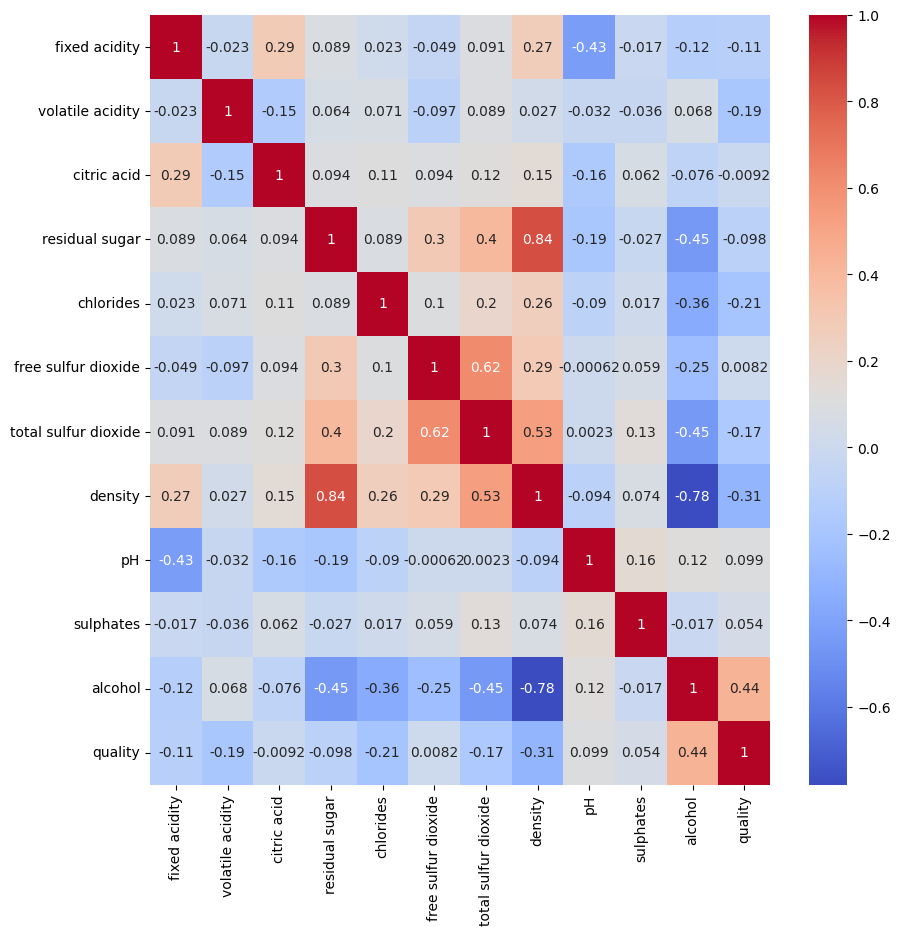

In [9]:
#Hacemos un análisis de correlación, vemos que hay correlación entre algunas varaibles pero quality que es nuestra variable de interés no esta prácitcamente correlacionada con nada a excepción de "alcohol"
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [10]:
#Remover outliers con la distancia de mahalanobis quedandonos con el 98% de los datos.
cov_matrix = np.cov(data.T)
inv_cov = np.linalg.inv(cov_matrix)
mean_vec = np.mean(data, axis=0)
diff = data - mean_vec
md = []

for i in range(len(data)):
    md.append(mahalanobis(data.iloc[i], mean_vec, inv_cov))

threshold = np.quantile(md, 0.98)
outliers = np.where(md > threshold)[0]
clean_data = data.drop(outliers, axis=0)
clean_response = df['quality'].drop(outliers, axis=0)

In [11]:
#PCA para reducir la dimensionalidad a 2 dimensiones y comprobar gráficamente los clusters (7 Clusters)
pca = PCA(n_components = 2)
pca.fit(clean_data)
print("Exp Var Ratio : ", pca.explained_variance_ratio_)

transformed_data = pca.transform(clean_data)
pc1 = transformed_data[:,0]
pc2 = transformed_data[:,1]
response_var = clean_response

Exp Var Ratio :  [0.91347075 0.07573232]


<ipython-input-12-020bad7ded58>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', 10)
<ipython-input-12-020bad7ded58>:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pc1[response_var==i], pc2[response_var==i], c=cmap(i), label='Label '+str(i))


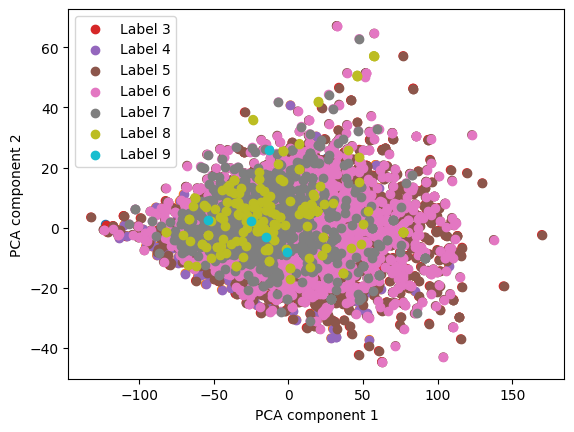

In [12]:
#Graficamos en 2D los dos clusters.
cmap = cm.get_cmap('tab10', 10)
plt.scatter(transformed_data[:,0], transformed_data[:,1],c=clean_response, cmap=cmap)
for i in np.unique(response_var):
    plt.scatter(pc1[response_var==i], pc2[response_var==i], c=cmap(i), label='Label '+str(i))

plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.legend()
plt.show()

In [13]:
# Vemos que en 2 dimensiones es difícil diferenciar los clusters por lo que agregaremos una tercera dimension.

In [14]:
# Hacemos nuevamente PCA para 3 dimensiones.
pca = PCA(n_components = 3)
pca.fit(clean_data)
pca.explained_variance_ratio_


transformed_data = pca.transform(clean_data)
pc1 = transformed_data[:,0]
pc2 = transformed_data[:,1]
pc3 = transformed_data[:,2]

response_var = clean_response

# Estos dos componenetes explican el 98.9% de la varianza original

<ipython-input-15-241747527570>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', 10)
<ipython-input-15-241747527570>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(pc1[response_var==i], pc2[response_var==i], pc3[response_var==i], c=cmap(i), label='Label '+str(i))


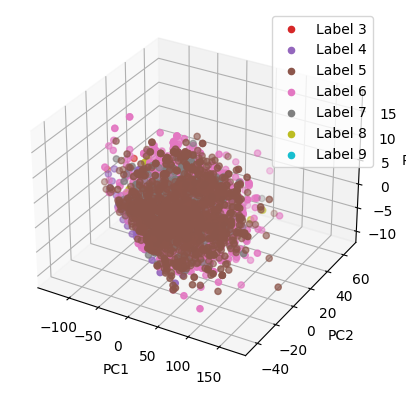

In [15]:
cmap = cm.get_cmap('tab10', 10)
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
for i in np.unique(response_var):
    ax.scatter(pc1[response_var==i], pc2[response_var==i], pc3[response_var==i], c=cmap(i), label='Label '+str(i))

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()

In [16]:
#Al ser dificil de diferenciar, buscamos graficarlo de un modo mas interactivo.

In [17]:
# Ahora vamos a interactuar con el grafico en 3D
fig = px.scatter_3d(df, x=pc1, y=pc2, z=pc3, color=response_var)
fig.show()

In [18]:
#Evidentemente no hay una clara diferenciación de clusters, indicandonos que la variable quality no es explicada por las otras variables claramente, por tanto no es posible crear clusters correctamente.

In [19]:
#Para verificar si los algoritmos de cluterización crean clusters similares utilizamos k-means en este caso.
kmeans= KMeans(n_clusters=7)
labels = kmeans.fit_predict(transformed_data)
fig = px.scatter_3d(df, x=pc1, y=pc2, z=pc3, color=labels)
fig.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [20]:
#Vemos que k-means crea clusters totalmente diferentes a los reales para la variable quality.

ari = adjusted_rand_score(response_var, labels)
silhouette = silhouette_score(transformed_data, labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(response_var, labels)
print('Adjusted Rand Index:', ari)
print('Silhouette Coefficient:', silhouette)
print('Homogeneity:', homogeneity)
print('Completeness:', completeness)
print('V-measure:', v_measure)

Adjusted Rand Index: 0.00873092273146275
Silhouette Coefficient: 0.3235341449779038
Homogeneity: 0.03409085840800683
Completeness: 0.023495871455678836
V-measure: 0.027818715487554907


*   Vemos que el ARI es aleatorio, el "agreement" entre los clusters reales y los predecidos.
*   El coeficiente de Silhouette nos indica que la clusterización es moderada
*   El índice de homogeneidad, completidad y medida V son muy bajos indicandonos la clusterización no hace buen fit a las clases reales.
*   **Se concluye que la clusterización por k-means no es buena o no hace referencia a la calidad.**


In [ ]:
# Ahora utilizaremos Hierarchical Clustering
agglomerative = AgglomerativeClustering(n_clusters=7)
labels = agglomerative.fit_predict(transformed_data)
fig = px.scatter_3d(df, x=pc1, y=pc2, z=pc3, color=labels)
fig.show()

In [ ]:
ari = adjusted_rand_score(response_var, labels)
silhouette = silhouette_score(transformed_data, labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(response_var, labels)
print('Adjusted Rand Index:', ari)
print('Silhouette Coefficient:', silhouette)
print('Homogeneity:', homogeneity)
print('Completeness:', completeness)
print('V-measure:', v_measure)

Adjusted Rand Index: 0.006237343000939006
Silhouette Coefficient: 0.28706046472166674
Homogeneity: 0.03427206375624316
Completeness: 0.024882063192754076
V-measure: 0.02883178909441735


*   Vemos que el ARI es aleatorio, el "agreement" entre los clusters reales y los predecidos.
*   El coeficiente de Silhouette nos indica que la clusterización es moderada
*   El índice de homogeneidad, completidad y medida V son muy bajos indicandonos la clusterización no hace buen fit a las clases reales.
*   **Se concluye que la clusterización por "Hierarchical Clustering" no es buena o no hace referencia a la calidad. Los resultados son iguales a los del K-Means**

# No Supervisado - Diferenciar Vino Blanco de Rojo

Ahora abordaremos el problema agregando un data set para los vinos rojos e intentaremos clusterizar los vinos entre rojos y blancos

In [ ]:
df_white = pd.read_csv('/content/drive/MyDrive/Aprendizaje Automatico/Unidad 2 Aprendizaje No Supervisado/dataset/winequality-white.csv', parse_dates=True)
df_red = pd.read_csv('/content/drive/MyDrive/Aprendizaje Automatico/Unidad 2 Aprendizaje No Supervisado/dataset/winequality-red.csv', parse_dates=True)

In [ ]:
df_white['label'] = 'white'
df_red['label'] = 'red'

In [ ]:
# Como las muestras estan desbalanceadas, escogeremos aleatoriamente un número de muestras de vino blanco equivalente al tamaño del vino rojo, de tal modo los cluters serán de igual tamaño.
sample_number = len(df_red.index)
df_white_sampled = df_white.sample(sample_number)

In [ ]:
df_concat = pd.concat([df_white_sampled,df_red], ignore_index=True)
df_concat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,6.900,0.190,0.390,8.000,0.028,22.000,84.000,0.994,3.110,0.660,10.800,6,white
1,7.900,0.310,0.220,13.300,0.048,46.000,212.000,0.999,3.470,0.590,10.000,5,white
2,5.600,0.260,0.180,1.400,0.034,18.000,135.000,0.992,3.320,0.350,10.200,6,white
3,7.300,0.190,0.680,1.500,0.050,31.000,156.000,0.995,3.320,0.640,9.400,6,white
4,6.900,0.260,0.290,4.200,0.043,33.000,114.000,0.990,3.160,0.310,12.500,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6.200,0.600,0.080,2.000,0.090,32.000,44.000,0.995,3.450,0.580,10.500,5,red
3194,5.900,0.550,0.100,2.200,0.062,39.000,51.000,0.995,3.520,0.760,11.200,6,red
3195,6.300,0.510,0.130,2.300,0.076,29.000,40.000,0.996,3.420,0.750,11.000,6,red
3196,5.900,0.645,0.120,2.000,0.075,32.000,44.000,0.995,3.570,0.710,10.200,5,red


In [ ]:
#Creamos nuestra etiqueta de clusters que en este caso es el label rojo o blanco
inputs = df_concat.drop(columns=['label']).columns
y_true = df_concat['label']
data = df_concat[inputs]

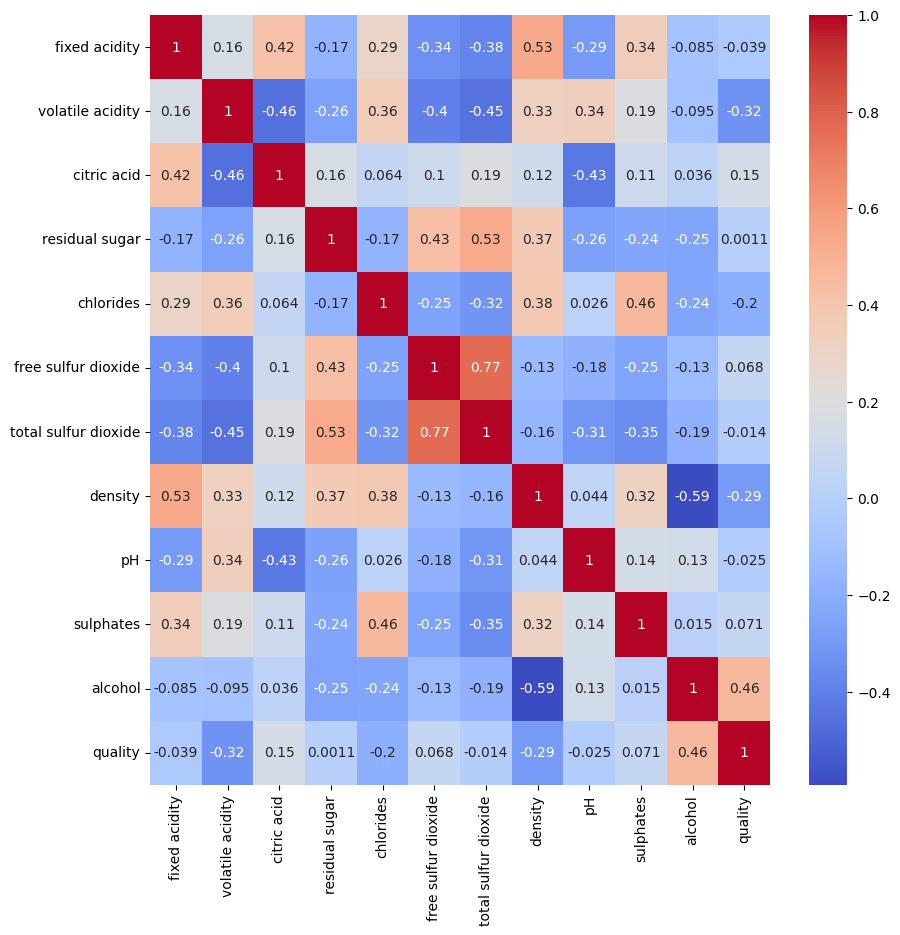

In [ ]:
# Evaluamos la matriz de correlacion, vemos que algunas variables estan correlacionadas con otras
corr_matrix = df_concat.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [ ]:
#Remover outliers con la distancia de mahalanobis quedandonos con el 96% de los datos.
cov_matrix = np.cov(data.T)
inv_cov = np.linalg.inv(cov_matrix)
mean_vec = np.mean(data, axis=0)
diff = data - mean_vec
md = []

for i in range(len(data)):
    md.append(mahalanobis(data.iloc[i], mean_vec, inv_cov))

threshold = np.quantile(md, 0.96)
outliers = np.where(md > threshold)[0]
clean_data = data.drop(outliers, axis=0)
clean_response = df_concat['label'].drop(outliers, axis=0)

In [ ]:
#PCA Las dos variables explican el 99.5% de la varianza.
pca = PCA(n_components = 2)
pca.fit(clean_data)
print("Exp Var Ratio : ", pca.explained_variance_ratio_)

transformed_data = pca.transform(clean_data)
pc1 = transformed_data[:,0]
pc2 = transformed_data[:,1]

response_var = clean_response

Exp Var Ratio :  [0.96972485 0.02615276]


<ipython-input-292-e079adc25a43>:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-292-e079adc25a43>:6: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



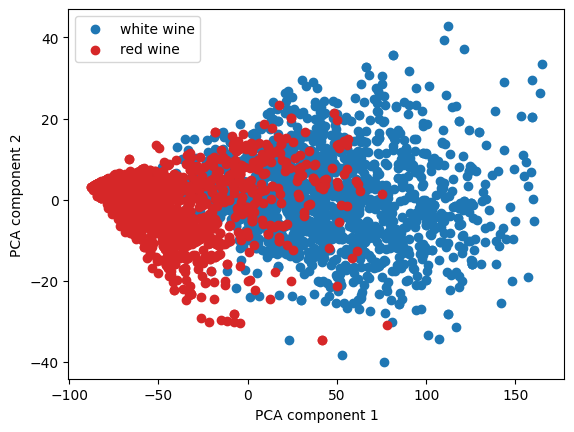

In [ ]:
#Graficamos en 2D
cmap = cm.get_cmap('tab10', 4)
colors = response_var.unique()

for i in range(len(colors)):
  plt.scatter(pc1[response_var==colors[i]], pc2[response_var==colors[i]], c=cmap(i), label=colors[i] + ' wine')

plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.legend()
plt.show()

En la gráfica se logra observar dos clusters, pero uno esta haciendo overlap sobre el otro por lo que es necesario agregar una nueva dimension para separar los puntos mejor

In [ ]:
pca = PCA(n_components = 3)
pca.fit(clean_data)
print(pca.explained_variance_ratio_)

transformed_data = pca.transform(clean_data)
pc1 = transformed_data[:,0]
pc2 = transformed_data[:,1]
pc3 = transformed_data[:,2]

response_var = clean_response

# Estos tres componenetes explican el 99.8% de la varianza original

[0.96972485 0.02615276 0.00306849]


<ipython-input-294-8fc63384a6cd>:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-294-8fc63384a6cd>:9: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



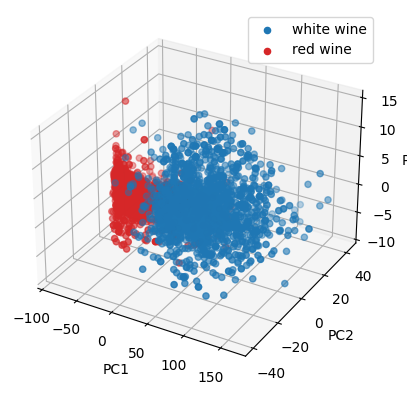

In [ ]:
#Graficamos en 3D
cmap = cm.get_cmap('tab10', 4)
fig = plt.figure()
colors = response_var.unique()

ax = fig.add_subplot(111, projection='3d')

for i in range(len(colors)):
    ax.scatter(pc1[response_var==colors[i]], pc2[response_var==colors[i]], pc3[response_var==colors[i]], c=cmap(i), label=str(colors[i])+ ' wine')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()

Vemos ahora una diferencia mas clara entre los dos clusters reales

In [ ]:
## Ahora vamos a interactuar con el grafico en 3D
fig = px.scatter_3d(df, x=pc1, y=pc2, z=pc3, color=response_var)
fig.show()

Con esta interacción vemos una clara diferencia entre los dos clusters reales, aun existe un overlap entre clases que podría ser separado en dimensiones superiores pero nos quedaremos con 3 dimensiones, no todas las variables son explicativas

In [ ]:
# Ahora clusterizaremos por K-means y verificaremos contra los clusters reales
kmeans= KMeans(n_clusters=2)
labels = kmeans.fit_predict(transformed_data)
fig = px.scatter_3d(df, x=pc1, y=pc2, z=pc3, color=labels)
fig.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Vemos gráficamente que k-means hace una separación muy parecida a la de la clusterización real, es necesario verificar las métricas.

In [ ]:
ari = adjusted_rand_score(response_var, labels)
silhouette = silhouette_score(transformed_data, labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(response_var, labels)
print('Adjusted Rand Index:', ari)
print('Silhouette Coefficient:', silhouette)
print('Homogeneity:', homogeneity)
print('Completeness:', completeness)
print('V-measure:', v_measure)

Adjusted Rand Index: 0.575878659388482
Silhouette Coefficient: 0.5934944285346921
Homogeneity: 0.47189389264725096
Completeness: 0.4723336434833334
V-measure: 0.4721136656637044




*   El ARI nos indica un agreement relativamente bueno entre los clusters reales y los predichos.
*   El coeficiente de Silhouette nos indica que la clusterización es relativamente buena.
*   El índice de homogeneidad, completitud y medida V son relativamente altos sugieren que los clusters predichos hacen un match relativamente bueno respecto a los reales
*  **Como conclusión observamos que el algoritmo de k-means se comporta relativamente bien para la creación de los clusters**





In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=2)
labels = agglomerative.fit_predict(transformed_data)
fig = px.scatter_3d(df, x=pc1, y=pc2, z=pc3, color=labels)
fig.show()

In [ ]:
ari = adjusted_rand_score(response_var, labels)
silhouette = silhouette_score(transformed_data, labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(response_var, labels)
print('Adjusted Rand Index:', ari)
print('Silhouette Coefficient:', silhouette)
print('Homogeneity:', homogeneity)
print('Completeness:', completeness)
print('V-measure:', v_measure)

Adjusted Rand Index: 0.4902924973443047
Silhouette Coefficient: 0.5790200433940568
Homogeneity: 0.41406779705737273
Completeness: 0.421746463512248
V-measure: 0.4178718581428365



*   El ARI nos indica un agreement algo bueno entre los clusters reales y los predichos.
*   El coeficiente de Silhouette nos indica que la clusterización es relativamente buena.
*   El índice de homogeneidad, completitud y medida V son relativamente altos sugieren que los clusters predichos hacen un match relativamente bueno respecto a los reales
*  **Como conclusión observamos que el algoritmo de Hierarchical se comporta relativamente bien para la creación de los clusters. Los resultados son similares al k-means pero ligeramente inferiores**

In [ ]:
# Finalmente probaremos si DBSCAN es capaz de identificar los clusters y que tan bien lo hace.
dbscan = DBSCAN(eps=1, min_samples=1)
labels = dbscan.fit_predict(transformed_data)
fig = px.scatter_3d(df, x=pc1, y=pc2, z=pc3, color=labels)
fig.show()

In [ ]:
ari = adjusted_rand_score(response_var, labels)
silhouette = silhouette_score(transformed_data, labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(response_var, labels)
print('Adjusted Rand Index:', ari)
print('Silhouette Coefficient:', silhouette)
print('Homogeneity:', homogeneity)
print('Completeness:', completeness)
print('V-measure:', v_measure)

Adjusted Rand Index: 0.012578917087541015
Silhouette Coefficient: 0.19135776051830103
Homogeneity: 0.9786139240849889
Completeness: 0.0951073008004399
V-measure: 0.1733659104212665


Si bien DBSCAN nos separo los cluters con una escala de calor donde observamos los cluters mas parecidos a los reales a un lado del espacio, los resultados no son suficientemente buenos comparados a K-means y Hierarchical Clustering, además creo una cantidad muy grande de clusters.